# Linear transformation and affine transformation.

Shape of pos_M is (2, 32)


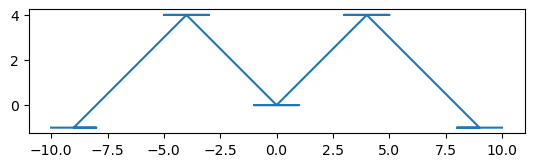

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# pos_M holds the (x, y) coordinates of the shape's vertices.
# Each column is one point [x, y].T
pos_M = np.array([[-10, -8, -9, -8, -7, -6, -5, -4, -5, -3, -4, -3, -2, -1, 0, -1, 1,0, 1, 2, 3, 4, 3, 5, 4, 5, 6, 7, 8, 9, 8, 10],
                  [-1, -1, -1, 0, 1, 2, 3, 4, 4, 4, 4, 3, 2, 1, 0, 0, 0, 0, 1, 2, 3, 4, 4, 4, 4, 3, 2, 1, 0, -1, -1, -1]])

print(f"Shape of pos_M is {pos_M.shape}")

def plot_shape(P):
  """
  Plots a single shape defined by the 2xN matrix P.
  """
  plt.figure()
  plt.plot(P[0], P[1])
  ax = plt.gca()
  # Set aspect ratio to 'equal' to avoid distortion
  ax.set_aspect('equal')
  plt.show()

# Plot the original shape
plot_shape(pos_M)

def plot_resulting_shape(pos_M_result, pos_M):
  """
  Plots the original shape (pos_M) and the transformed shape 
  (pos_M_result) on the same axes for comparison.
  """
  plt.figure()
  # Plot original shape
  plt.plot(pos_M[0], pos_M[1])
  # Plot transformed shape
  plt.plot(pos_M_result[0], pos_M_result[1])
  ax = plt.gca()
  ax.axes.xaxis.set_visible(False)
  ax.axes.yaxis.set_visible(False)
  # Set aspect ratio to 'equal'
  ax.set_aspect('equal') 
  plt.show()

# Single transformation



For each prescribed transformation below, please


1.  construct the transformation matrix;
2.  apply them on pos_M;
3.  call the plot function to plot the resulting shapes.

Scaling result:


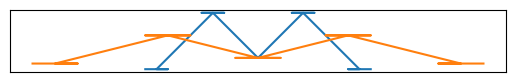

In [17]:
# Scaling
print("Scaling result:")
# Define the 2x2 scaling matrix
A_scale = np.array([[2, 0], [0, 0.5]])

# Apply the transformation: P_new = A * P_old
pos_M_scale = A_scale @ pos_M       # resulting shape

# Plot the result against the original
plot_resulting_shape(pos_M_scale, pos_M)    # plotting

Rotation result:


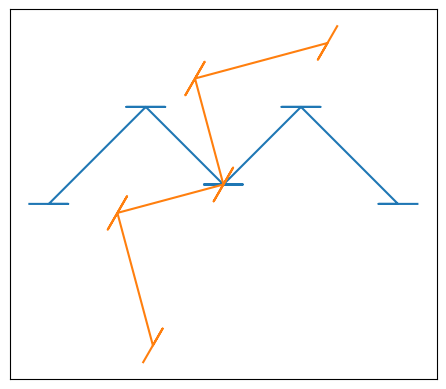

In [18]:
# Rotation
print("Rotation result:")
# Define the 2x2 rotation matrix:
# [cos(theta), -sin(theta)]
# [sin(theta),  cos(theta)]
theta = np.radians(60)
A_rotate = np.array([[np.cos(theta), -np.sin(theta)], 
                    [np.sin(theta),  np.cos(theta)]])

# Apply the transformation
pos_M_rotate = A_rotate @ pos_M

# Plot the result
plot_resulting_shape(pos_M_rotate, pos_M)

Translation result:


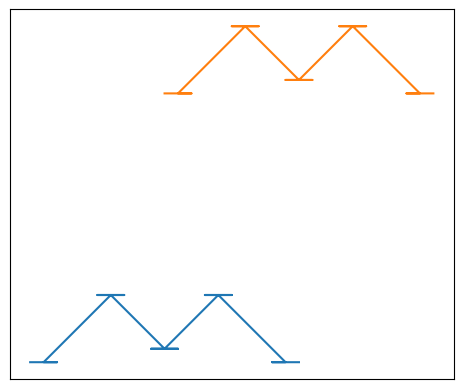

In [20]:
# Translation
print("Translation result:")
# Define the translation vector (2x1)
A_translate = np.array([[10],[20]])

# Apply the transformation: P_new = P_old + T
pos_M_translate = pos_M + A_translate

# Plot the result
plot_resulting_shape(pos_M_translate, pos_M)

Shearing 1 result:


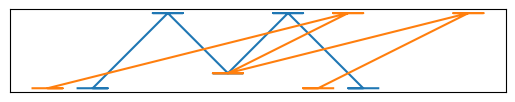

In [21]:
# Shearing 1
print("Shearing 1 result:")
# Define the horizontal shear matrix:
# [1, k]
# [0, 1]
A_shear_h = np.array([[1, 3], [0, 1]])

# Apply the transformation
pos_M_shear_h = A_shear_h @ pos_M

# Plot the result
plot_resulting_shape(pos_M_shear_h, pos_M)

Shearing 2 result:


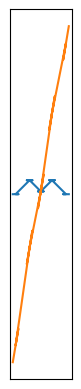

In [22]:
# Shearing 2
print("Shearing 2 result:")
# Define the vertical shear matrix:
# [1, 0]
# [k, 1]
A_shear_v = np.array([[1, 0], [6, 1]])

# Apply the transformation
pos_M_shear_v = A_shear_v @ pos_M

# Plot the result
plot_resulting_shape(pos_M_shear_v, pos_M)

## Compositions of  Transformations

### Please use the **transformation matrices constructed in the previous Problem to apply multiple transformations to the base shape then call the plot function to plot the resulting shapes.


Sequence 1 result: 


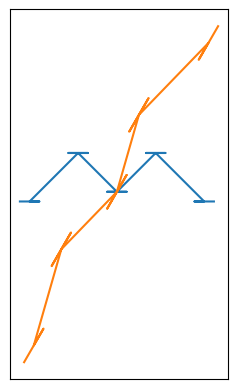

In [23]:
# Sequence 1
print("Sequence 1 result: ")
# The combined transformation is A_seq1 = A_rotate * A_scale
A_seq1 = A_rotate @ A_scale

# Apply the combined transformation
pos_M_seq1 = A_seq1 @ pos_M

# Plot the result
plot_resulting_shape(pos_M_seq1, pos_M)

Sequence 2 result: 


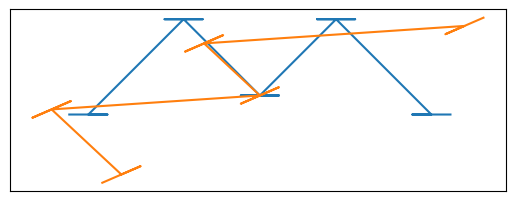

In [24]:
# Sequence 2
print("Sequence 2 result: ")
# The combined transformation is A_seq2 = A_scale * A_rotate
A_seq2 = A_scale @ A_rotate

# Apply the combined transformation
pos_M_seq2 = A_seq2 @ pos_M

# Plot the result (Note how it differs from Sequence 1)
plot_resulting_shape(pos_M_seq2, pos_M)

Sequence 3 result: 


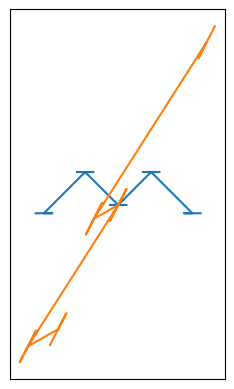

In [25]:
# Sequence 3
print("Sequence 3 result: ")
# A_seq3 = A_scale * A_shear_v * A_rotate
# We use np.dot for multiple matrix multiplication
A_seq3 = A_scale @ A_shear_v @ A_rotate

# Apply the combined transformation
pos_M_seq3 = A_seq3 @ pos_M

# Plot the result
plot_resulting_shape(pos_M_seq3, pos_M)

Sequence 4 result: 


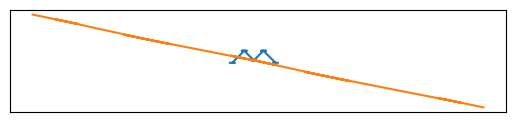

In [26]:
# Sequence 4
print("Sequence 4 result: ")
# A_seq4 = A_scale * A_rotate * A_shear_v
A_seq4 = A_scale @ A_rotate @ A_shear_v

# Apply the combined transformation
pos_M_seq4 = A_seq4 @ pos_M

# Plot the result (Note the difference from Sequence 3)
plot_resulting_shape(pos_M_seq4, pos_M)

## Inverse transformation

### Hint: undoing a transformation is performing the **inverse** transformation

Undo Rotation Result: 


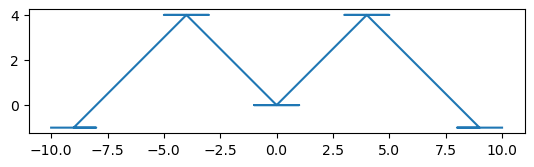

In [28]:
# Please undo the rotation
print("Undo Rotation Result: ")
# Find the inverse of the rotation matrix
A_inverse_rotate = np.linalg.inv(A_rotate)

# Apply the inverse transformation to the rotated shape
pos_M_rotate_back = A_inverse_rotate @ pos_M_rotate

# Plot the result, which should be the original shape
# (Note: plot_shape is used, not plot_resulting_shape)
plot_shape(pos_M_rotate_back)

Undo Shearing 1 Result: 


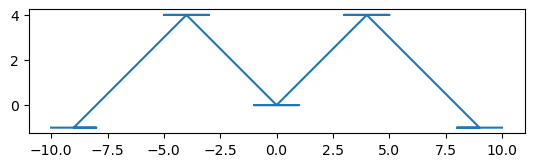

In [29]:
# Please undo the shearing 1
# tranform the pos_M_shear_h in Problem 1.1 back to pos_M (original shape)
print("Undo Shearing 1 Result: ")
A_inverse_shear_h = np.linalg.inv(A_shear_h)
pos_M_shear_h_back = A_inverse_shear_h@pos_M_shear_h
plot_shape(pos_M_shear_h_back)

Undo Sequence 1 Result: 


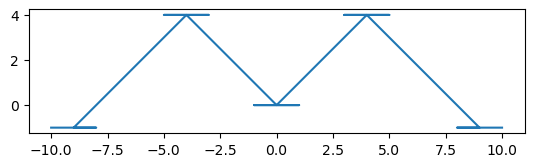

In [30]:
# Please find the inverse of Sequence 1
print("Undo Sequence 1 Result: ")
# Find the inverse of the combined matrix A_seq1
A_inverse_seq1 = np.linalg.inv(A_seq1)

# Apply the inverse to the transformed shape pos_M_seq1
pos_M_seq1_back = A_inverse_seq1 @ pos_M_seq1

# Plot the result
plot_shape(pos_M_seq1_back)

Undo Sequence 2 Result: 


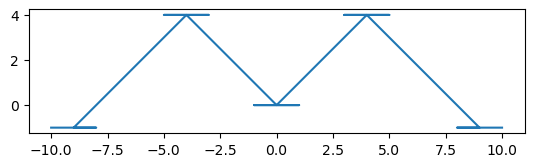

In [31]:
# Please find the inverse of Sequence 2
print("Undo Sequence 2 Result: ")
# The inverse of A_seq1 is being used here as in the original file
# To truly undo Sequence 2, you would use np.linalg.inv(A_seq2)
A_inverse_seq2 = np.linalg.inv(A_seq1) 

# Apply the inverse to the result of Sequence 1
pos_M_seq2_back = A_inverse_seq2 @ pos_M_seq1

# Plot the shape
plot_shape(pos_M_seq2_back)